In [1]:
# Install Essential Libraries
!pip install ultralytics
from IPython import display
display.clear_output()

import wandb
# Import Essential Libraries
import os
import shutil
import random
import pandas as pd
from PIL import Image
import cv2
import yaml
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'axes.facecolor': '#9b63b8'}, style='darkgrid')

import pathlib
import glob
import warnings
warnings.filterwarnings('ignore')

# ورود به Weights & Biases
wandb.login(key='fb34c333b00d4736d6be52fd6865d28800975566')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [2]:
# Load a pretrained YOLOv8n model from Ultralytics
Vio_Model = YOLO("yolov9e.pt")

100%|██████████| 112M/112M [00:00<00:00, 178MB/s] 


In [5]:
#### Train the model on our custom dataset
yaml_file_path = '/kaggle/input/helmet/data.yaml'
results = Vio_Model.train(
    data= yaml_file_path,     # Path to the dataset configuration file
    epochs=100,                # Number of epochs to train for
    #imgsz=640,               # Size of input images as integer
    #device= '1',             # Device to run on, i.e. cuda device=1,2,3,4
    #patience=20,             # Epochs to wait for no observable improvement for early stopping of training
    batch= -1,               # Number of images per batch
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
                  # Random seed for reproducibility
    #dropout=0.2,             # Use dropout regularization
)

Ultralytics 8.3.44 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9e.pt, data=/kaggle/input/helmet/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning /kaggle/input/helmet/train/labels... 896 images, 0 backgrounds, 0 corrupt: 100%|██████████| 896/896 [00:01<00:00, 729.45it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/helmet/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 8.64G reserved, 1.65G allocated, 4.45G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    58147225       192.7         2.110         98.81          52.5        (1, 3, 640, 640)                    list
    58147225       385.4         2.970         100.7         87.77        (2, 3, 640, 640)                    list
    58147225       770.7         5.323         154.8         172.1        (4, 3, 640, 640)                    list
    58147225        1541         9.943         309.2         337.1        (8, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 5653 has 14.73 GiB memory in use. Of the allocated memory 14.43 GiB is allocated by PyTorch, and 140.42 MiB is reserved by PyT

train: Scanning /kaggle/input/helmet/train/labels... 896 images, 0 backgrounds, 0 corrupt: 100%|██████████| 896/896 [00:00<00:00, 929.34it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/helmet/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/helmet/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 472.83it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/helmet/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.0005), 309 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       3.3G      1.334      1.519       1.59          1        640: 100%|██████████| 896/896 [03:12<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  9.75it/s]

                   all         30         38      0.368      0.353      0.418      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.63G      1.364      1.602      1.624          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.20it/s]

                   all         30         38      0.224      0.211      0.134     0.0829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.57G       1.41      1.687      1.668          0        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.22it/s]

                   all         30         38      0.592      0.267      0.277      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.57G       1.45      1.741      1.686          2        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.02it/s]

                   all         30         38      0.918      0.178      0.177      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.57G      1.443      1.705        1.7          4        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.09it/s]

                   all         30         38     0.0323      0.878     0.0367     0.0176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.57G      1.371      1.619      1.691          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.12it/s]

                   all         30         38      0.357      0.533      0.523      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.57G      1.424      1.599      1.691          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.15it/s]

                   all         30         38       0.92      0.289      0.443      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.57G       1.41      1.579      1.675          1        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.25it/s]

                   all         30         38      0.988      0.286      0.363      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.57G       1.41      1.598      1.658          4        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.25it/s]

                   all         30         38      0.389      0.611      0.504      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.57G      1.349      1.527      1.611          0        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.27it/s]

                   all         30         38      0.531      0.556       0.52      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.57G      1.366      1.538      1.629          0        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.10it/s]

                   all         30         38      0.446      0.733      0.669      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.57G      1.317      1.514      1.613          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.27it/s]

                   all         30         38      0.974      0.267      0.369      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.57G      1.341      1.482      1.625          4        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.17it/s]

                   all         30         38      0.988      0.299      0.387      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.57G      1.305      1.444      1.584          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.09it/s]

                   all         30         38      0.954      0.277      0.405      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.57G      1.311      1.466      1.597          5        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.26it/s]

                   all         30         38      0.443      0.525      0.548      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.57G      1.341      1.464      1.592          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.25it/s]

                   all         30         38       0.23        0.4      0.377      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.57G      1.297      1.459      1.574          3        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.27it/s]

                   all         30         38      0.329      0.689      0.512      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.57G      1.279      1.419      1.567          4        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.28it/s]

                   all         30         38      0.464      0.739      0.537       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.57G      1.273      1.367      1.529          5        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.31it/s]

                   all         30         38      0.327        0.8      0.525      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.57G      1.307       1.31      1.585          4        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.21it/s]

                   all         30         38      0.385      0.467      0.477      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.57G      1.293      1.395      1.558          6        640: 100%|██████████| 896/896 [03:06<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.32it/s]

                   all         30         38      0.341        0.8      0.515      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.57G      1.285      1.375      1.587          2        640: 100%|██████████| 896/896 [03:06<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.31it/s]

                   all         30         38       0.69      0.667      0.631      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.57G      1.258      1.305      1.536          3        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.21it/s]

                   all         30         38      0.401       0.46      0.453      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.57G      1.248      1.309      1.542          2        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.27it/s]

                   all         30         38      0.376      0.676      0.502      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.57G      1.227      1.309      1.503          4        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.29it/s]

                   all         30         38      0.569      0.526      0.587      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.57G      1.257      1.329      1.523          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.25it/s]

                   all         30         38      0.408      0.484      0.435      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.57G      1.233      1.319      1.521          4        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.22it/s]

                   all         30         38      0.436      0.811      0.677      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.57G      1.187      1.303      1.459          4        640: 100%|██████████| 896/896 [03:04<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.32it/s]

                   all         30         38      0.325      0.578      0.377      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.57G      1.191      1.285      1.493          1        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.32it/s]

                   all         30         38      0.929       0.42      0.665      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.57G      1.202      1.266      1.499          2        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.21it/s]

                   all         30         38      0.774      0.644      0.684      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.57G      1.239      1.277      1.515          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.26it/s]

                   all         30         38      0.337      0.604      0.638      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.57G      1.226      1.286      1.501          5        640: 100%|██████████| 896/896 [03:04<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.31it/s]

                   all         30         38       0.67      0.931      0.791      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.57G      1.189      1.223      1.491          2        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.30it/s]

                   all         30         38      0.648      0.905      0.813      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.57G      1.139      1.207       1.43          1        640: 100%|██████████| 896/896 [03:04<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.14it/s]

                   all         30         38      0.452        0.7      0.623      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.57G      1.204      1.254      1.507          5        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.24it/s]

                   all         30         38      0.377      0.603      0.554      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.57G      1.174      1.226      1.481          5        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.22it/s]

                   all         30         38       0.44       0.69      0.683      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.57G      1.149      1.167      1.441          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.24it/s]

                   all         30         38      0.617      0.601      0.657      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.57G      1.182      1.231      1.475          3        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.17it/s]

                   all         30         38      0.452      0.674      0.629      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.57G      1.146      1.174      1.429          4        640: 100%|██████████| 896/896 [03:06<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.27it/s]

                   all         30         38       0.56      0.557      0.644      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.57G      1.171      1.182      1.472          2        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.29it/s]

                   all         30         38      0.549      0.533      0.664      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.57G      1.116      1.151      1.417          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.12it/s]

                   all         30         38      0.942      0.444      0.566      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.57G      1.108      1.174      1.423         10        640: 100%|██████████| 896/896 [03:06<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.15it/s]

                   all         30         38      0.632      0.578      0.656        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.57G      1.143      1.148      1.451          7        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.19it/s]

                   all         30         38      0.518      0.856      0.683      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.57G      1.143      1.184      1.441          3        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.29it/s]

                   all         30         38      0.646      0.821      0.745      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.57G       1.11      1.145      1.416          1        640: 100%|██████████| 896/896 [03:04<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.29it/s]

                   all         30         38      0.645      0.433      0.537       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.57G      1.133      1.103      1.431          2        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.19it/s]

                   all         30         38      0.605      0.678      0.674      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.57G       1.11      1.136      1.425          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.29it/s]

                   all         30         38      0.577        0.8      0.704      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.57G      1.138      1.118      1.453          4        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.26it/s]

                   all         30         38      0.328      0.689      0.441      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.57G      1.124      1.081       1.43          3        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.29it/s]

                   all         30         38      0.743      0.915      0.812      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.57G      1.093      1.101      1.403          1        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.26it/s]


                   all         30         38      0.969      0.447      0.548       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.57G      1.113      1.087      1.424          3        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.12it/s]

                   all         30         38       0.61      0.555      0.617      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.57G      1.098      1.088      1.412          4        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.22it/s]

                   all         30         38      0.522      0.556      0.567      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.57G      1.061      1.078      1.374          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.28it/s]

                   all         30         38      0.579      0.672      0.616      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.57G      1.082      1.038      1.381          9        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.37it/s]

                   all         30         38      0.635      0.611       0.67      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.57G      1.101        1.1      1.414          2        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.24it/s]

                   all         30         38       0.84      0.789      0.844      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.57G      1.073      1.052      1.392          2        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.24it/s]

                   all         30         38      0.575      0.677      0.709       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.57G       1.06      1.028      1.373          6        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.25it/s]

                   all         30         38      0.449      0.583      0.677      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.57G      1.053      1.003      1.356          4        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.30it/s]

                   all         30         38      0.499      0.633      0.672      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.57G       1.05      1.051      1.367          3        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.23it/s]

                   all         30         38      0.688      0.676      0.633      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.57G      1.038      1.026      1.345          2        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.33it/s]

                   all         30         38      0.763      0.684       0.74      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.57G      1.064       1.04      1.378          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.23it/s]

                   all         30         38      0.742      0.744      0.727      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.57G      1.035      1.009      1.355          4        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.23it/s]

                   all         30         38      0.728      0.676      0.726      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.57G       1.01      1.006      1.316          4        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.20it/s]

                   all         30         38      0.787      0.614      0.778      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.57G      1.013     0.9826      1.337          4        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.09it/s]

                   all         30         38      0.579      0.922      0.731      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.57G      1.018     0.9913      1.347          4        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.18it/s]

                   all         30         38      0.615      0.633      0.718      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.57G      1.048     0.9706      1.361          7        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.21it/s]

                   all         30         38      0.785      0.608      0.714      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.57G      1.037      1.018      1.365          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.30it/s]

                   all         30         38      0.657      0.641      0.683      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.57G      1.014     0.9697      1.343          3        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.28it/s]

                   all         30         38      0.845      0.733      0.786      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.57G     0.9906     0.9509      1.329          2        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.23it/s]

                   all         30         38       0.55      0.885      0.727      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.57G     0.9978     0.9182      1.329          3        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.27it/s]

                   all         30         38      0.762       0.83      0.798      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.57G      1.013     0.9613      1.337          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.25it/s]

                   all         30         38      0.769      0.615      0.762      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.57G      1.022     0.9382      1.339          1        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.20it/s]

                   all         30         38      0.569      0.744      0.715      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.57G      1.004     0.9712      1.321          1        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.27it/s]

                   all         30         38      0.762      0.637       0.74      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.57G     0.9698     0.9395      1.305          5        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.17it/s]

                   all         30         38      0.745      0.678      0.759      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.57G     0.9893     0.9224      1.312          2        640: 100%|██████████| 896/896 [03:04<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.33it/s]

                   all         30         38      0.742      0.801      0.789      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.57G     0.9745      0.915      1.306          2        640: 100%|██████████| 896/896 [03:04<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.32it/s]

                   all         30         38      0.685      0.922      0.839      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.57G     0.9593     0.9018      1.286          1        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.30it/s]

                   all         30         38      0.667      0.892      0.736      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.57G     0.9802     0.8854      1.304          4        640: 100%|██████████| 896/896 [03:04<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.27it/s]

                   all         30         38      0.716        0.7      0.746      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.57G     0.9483     0.9164      1.277          5        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.25it/s]

                   all         30         38      0.776      0.844      0.829      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.57G     0.9493     0.9039      1.285          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.29it/s]

                   all         30         38      0.752       0.89      0.818      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.57G     0.9446     0.8963      1.292          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.23it/s]

                   all         30         38       0.57      0.922      0.773      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.57G     0.9791     0.9095      1.306          3        640: 100%|██████████| 896/896 [03:06<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.34it/s]

                   all         30         38      0.787      0.686      0.752      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.57G     0.9273     0.8573      1.286          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.29it/s]

                   all         30         38      0.778      0.742      0.751        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.57G     0.9249     0.8649      1.278          2        640: 100%|██████████| 896/896 [03:06<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.26it/s]

                   all         30         38      0.729       0.81      0.824      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.57G     0.9544     0.8906      1.293          3        640: 100%|██████████| 896/896 [03:06<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.28it/s]

                   all         30         38       0.78       0.76      0.823      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.57G     0.8958     0.8281      1.242          2        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.22it/s]

                   all         30         38      0.804      0.799       0.82      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.57G     0.9077     0.8459      1.245          6        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.23it/s]

                   all         30         38      0.766      0.888      0.852      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.57G     0.9096     0.8506      1.262          4        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.33it/s]

                   all         30         38      0.843      0.739      0.797      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.57G     0.8845      0.835      1.222          1        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.03it/s]


                   all         30         38      0.788      0.811      0.776      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.57G     0.8954     0.8925       1.23          0        640: 100%|██████████| 896/896 [03:05<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.28it/s]

                   all         30         38      0.724      0.769      0.782       0.47


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.57G     0.8307     0.6035      1.199          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.25it/s]

                   all         30         38      0.624      0.784      0.776       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.57G     0.7924     0.5651      1.189          2        640: 100%|██████████| 896/896 [03:06<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.29it/s]

                   all         30         38      0.762      0.691      0.779      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.57G     0.7757      0.545      1.183          2        640: 100%|██████████| 896/896 [03:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.27it/s]

                   all         30         38      0.724      0.789      0.782      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.57G     0.7601     0.5328      1.158          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.22it/s]

                   all         30         38      0.752      0.919      0.827      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.57G     0.7734     0.5294      1.159          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.25it/s]

                   all         30         38      0.767      0.922      0.821      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.57G     0.7586     0.5183      1.146          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.26it/s]

                   all         30         38      0.798      0.922      0.821      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.57G     0.7481     0.5231      1.143          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.27it/s]

                   all         30         38      0.799      0.921       0.84       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.57G     0.7359     0.5162      1.134          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.19it/s]

                   all         30         38      0.803       0.91      0.832      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.57G     0.7316     0.4977      1.122          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.25it/s]

                   all         30         38       0.81      0.922      0.823      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.57G     0.7324     0.4965      1.128          1        640: 100%|██████████| 896/896 [03:06<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 10.27it/s]

                   all         30         38      0.828      0.922      0.824      0.513



100 epochs completed in 5.270 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 117.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 117.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.44 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9e summary (fused): 687 layers, 57,378,713 parameters, 0 gradients, 189.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00, 11.90it/s]


                   all         30         38      0.766      0.889      0.852      0.525
                 Plate         30         30      0.842      0.967      0.976      0.692
            WithHelmet          5          5      0.886        0.8      0.938        0.5
         WithoutHelmet          3          3       0.57      0.899      0.641      0.383
Speed: 0.5ms preprocess, 37.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2


In [6]:
# Define the path to the directory
post_training_files_path = '/kaggle/working/runs/detect/train2/'

# List the files in the directory
!ls {post_training_files_path}

F1_curve.png					  train_batch1.jpg
PR_curve.png					  train_batch2.jpg
P_curve.png					  train_batch80640.jpg
R_curve.png					  train_batch80641.jpg
args.yaml					  train_batch80642.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1733515216.85060588629b.23.1  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


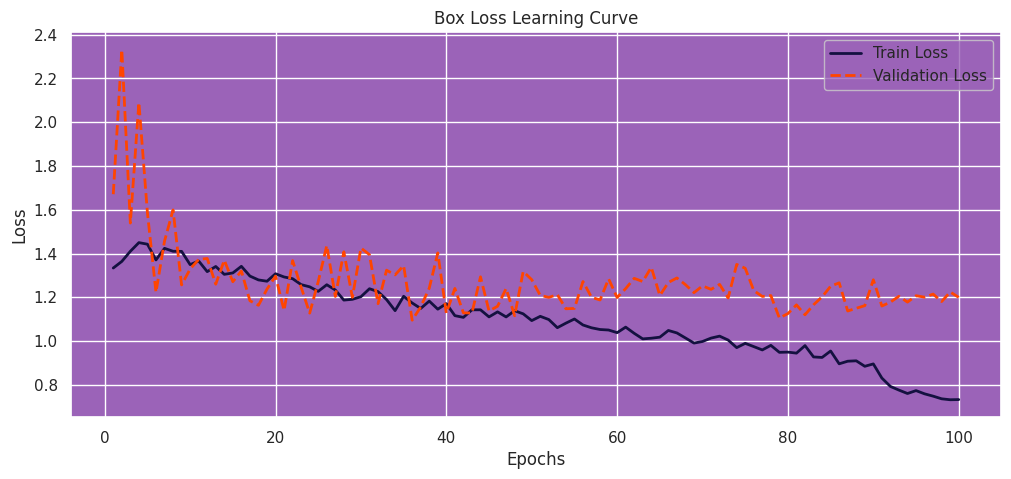

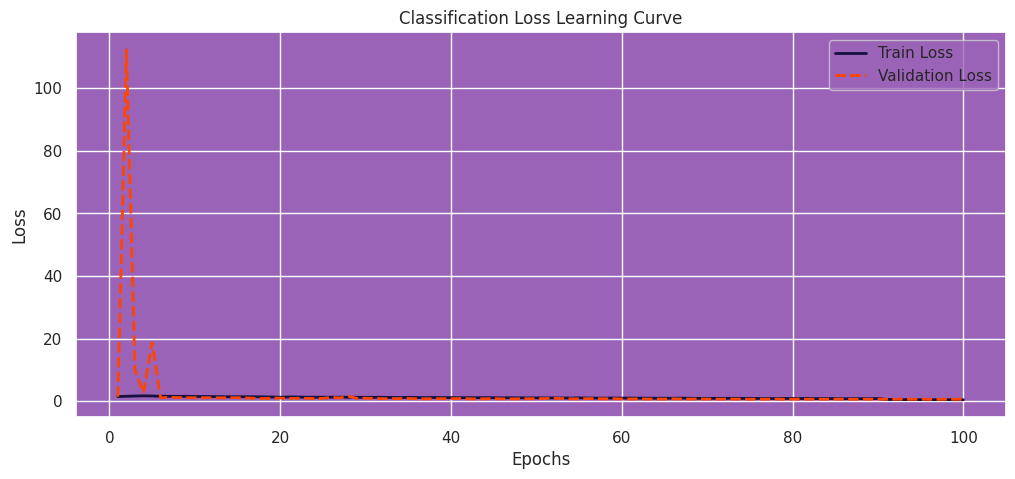

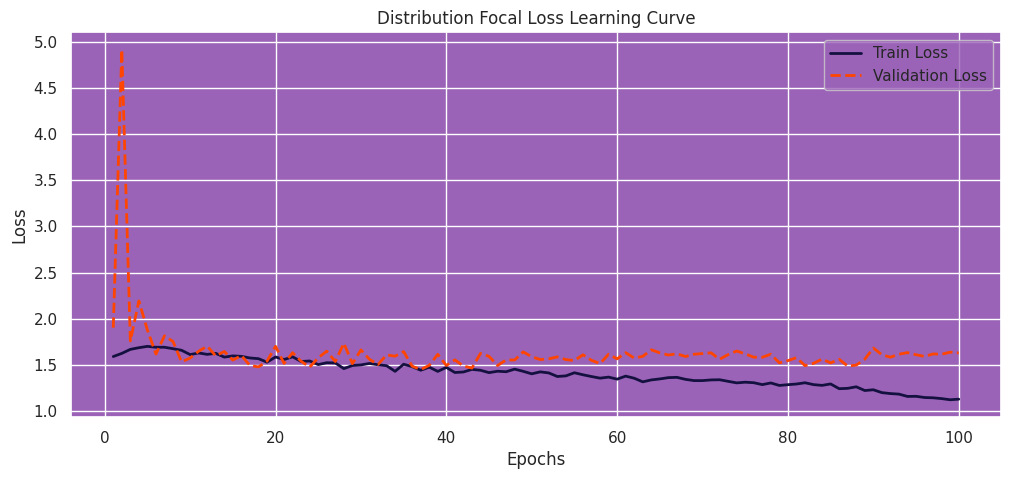

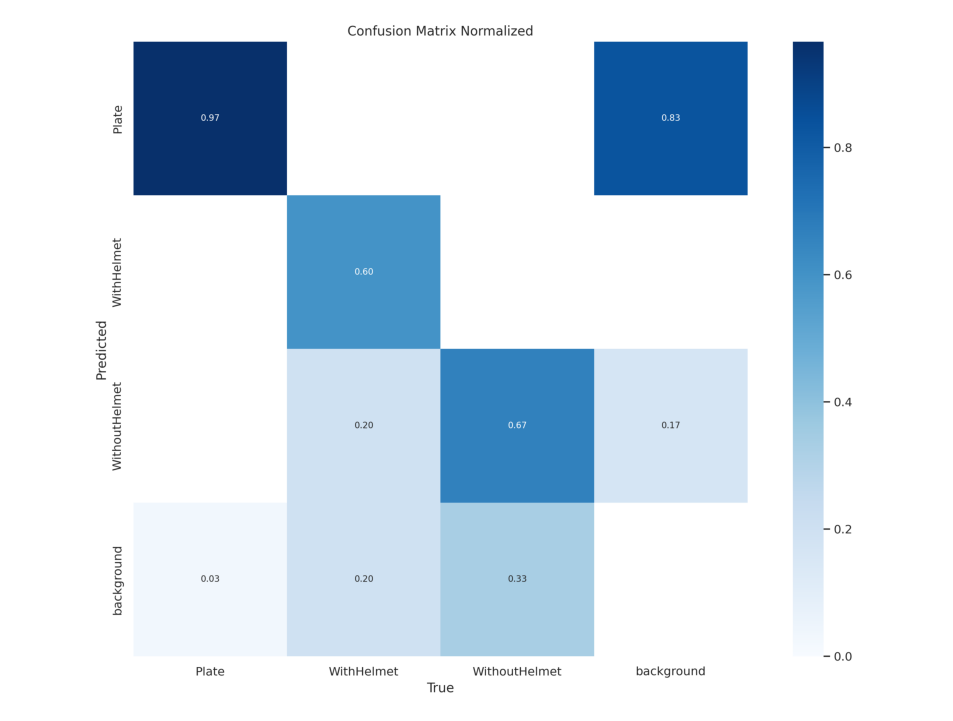

Ultralytics 8.3.44 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9e summary (fused): 687 layers, 57,378,713 parameters, 0 gradients, 189.1 GFLOPs


val: Scanning /kaggle/input/helmet/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 603.44it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/helmet/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


                   all         30         38      0.766      0.888      0.852      0.522
                 Plate         30         30      0.842      0.967      0.976      0.682
            WithHelmet          5          5      0.887        0.8      0.938        0.5
         WithoutHelmet          3          3      0.569      0.898      0.641      0.383
Speed: 0.3ms preprocess, 77.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


,Metric Value
metrics/precision(B),0.766
metrics/recall(B),0.888
metrics/mAP50(B),0.852
metrics/mAP50-95(B),0.522
fitness,0.555


In [7]:

# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')
plot_learning_curve(df, 'train/dfl_loss', 'val/dfl_loss', 'Distribution Focal Loss Learning Curve')

# Construct the path to the normalized confusion matrix image
confusion_matrix_path = os.path.join(post_training_files_path, 'confusion_matrix_normalized.png')

# Read the image using cv2
cm_img = cv2.imread(confusion_matrix_path)

# Convert the image from BGR to RGB color space for accurate color representation with matplotlib
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img)
plt.axis('off') 
plt.show()
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path )

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFram
metrics_df.round(3)


0: 640x640 1 Plate, 100.9ms
Speed: 3.0ms preprocess, 100.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 63.0ms
Speed: 3.2ms preprocess, 63.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 64.3ms
Speed: 1.8ms preprocess, 64.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 62.9ms
Speed: 1.8ms preprocess, 62.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 62.9ms
Speed: 1.8ms preprocess, 62.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Plates, 61.2ms
Speed: 2.0ms preprocess, 61.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 62.2ms
Speed: 1.6ms preprocess, 62.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


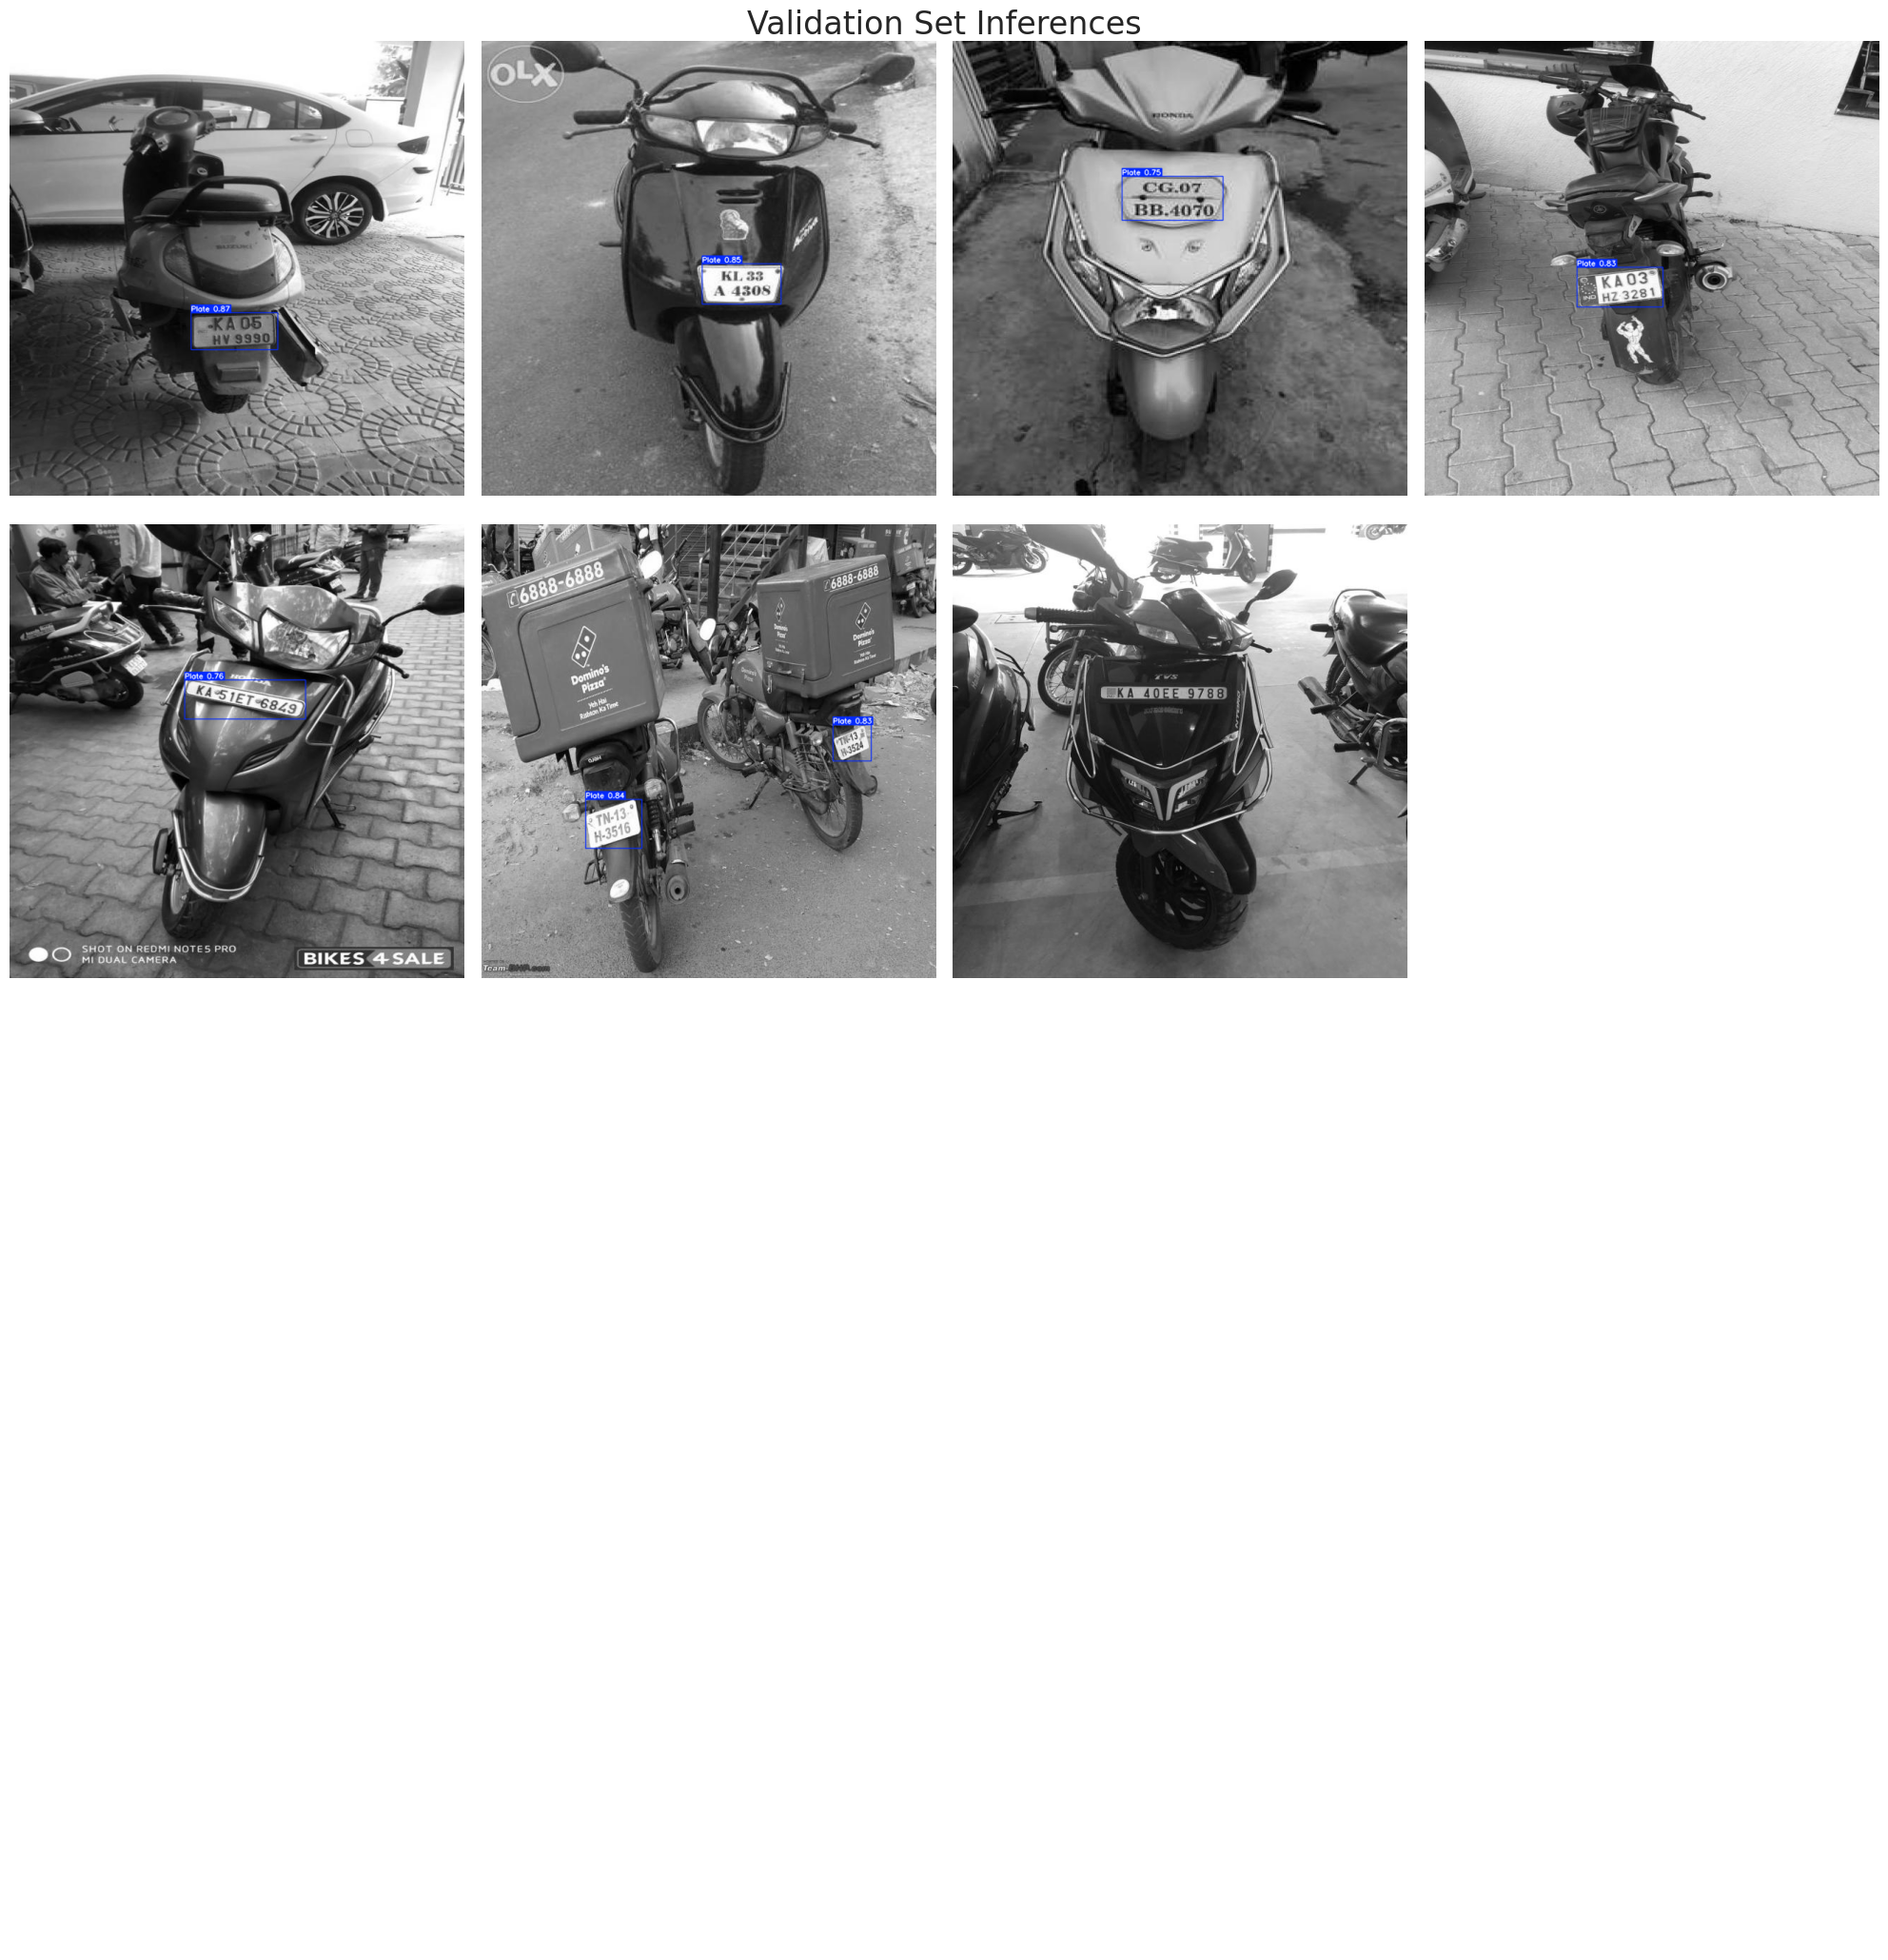

In [8]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/kaggle/input/helmet/'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 15)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(4, 4, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = best_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

